In [162]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS 

#Importing DataCleaning Libraries
import nltk
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

#Importing Classification Models 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, hamming_loss, average_precision_score

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [2]:
df1=pd.read_csv("train.csv")

__df1----> train dataset__

In [3]:
df1.shape

(159571, 8)

In [4]:
df1.sample(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
136992,dce93bd119b4783d,"""\n\n Lowell as """"Cradle of American Industria...",0,0,0,0,0,0
43713,74b20c3c755774d6,"I'm still working through the book, but it has...",0,0,0,0,0,0
48290,811370256bb8d21a,No I did not. I had to click through a couple ...,0,0,0,0,0,0
145953,24a06f493ddf9176,"""\nMO is a valid RS for the original stories, ...",0,0,0,0,0,0
85311,e42e281f46455bfd,"""\n Find alternative images. Remember that fai...",0,0,0,0,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df1.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

No null values present in the train dataset

In [13]:
#check the number of ubnlabelled comments
colSum = df1.iloc[:,2:].sum(axis=1) #find all rowswhere the dum of all cols(start from 2nd col) is 0 

print("Total comments = ",len(df1))
print("#Unlabelled comments = ",(colSum==0).sum(axis=0)) #axis=0 means row wise
print("#labelled comments = ",len(df1)-((colSum==0).sum(axis=0)))

Total comments =  159571
#Unlabelled comments =  143346
#labelled comments =  16225


In [16]:
df1.columns.values

array(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude',
       'threat', 'abuse', 'loathe'], dtype=object)

In [37]:
count = []
for col in df1.columns[2:]:
    count.append((col, df1[col].sum()))
count_df = pd.DataFrame(count, columns=['Label', '#comments'])
count_df

,Label,#comments
0,malignant,15294
1,highly_malignant,1595
2,rude,8449
3,threat,478
4,abuse,7877
5,loathe,1405


# EDA:

<AxesSubplot:title={'center':'Distribution of labeled comments'}, xlabel='Label'>

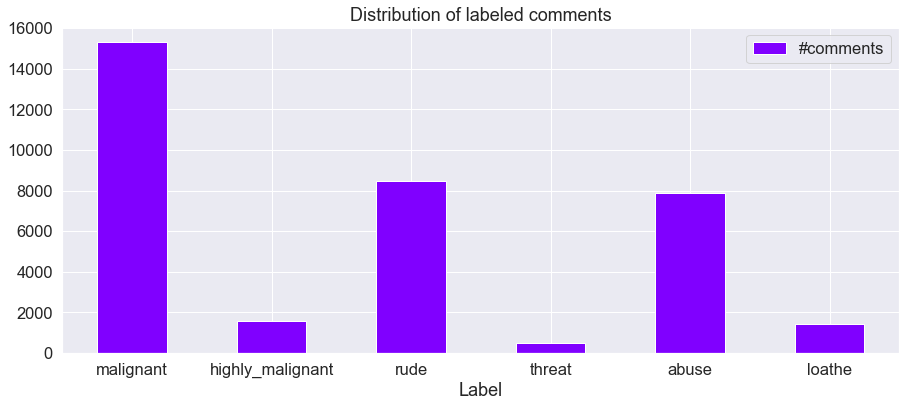

In [62]:
sns.set(font_scale = 1.5)
count_df.plot(x="Label",kind="bar",figsize=(15,6),title="Distribution of labeled comments",colormap="rainbow",rot=0)

In [64]:
#Comments with multiple labels 

sum_rows=df1.iloc[:,2:].sum(axis=1)#calculate the sum for each row from 2nd column onwards
unique_vals=sum_rows.value_counts()

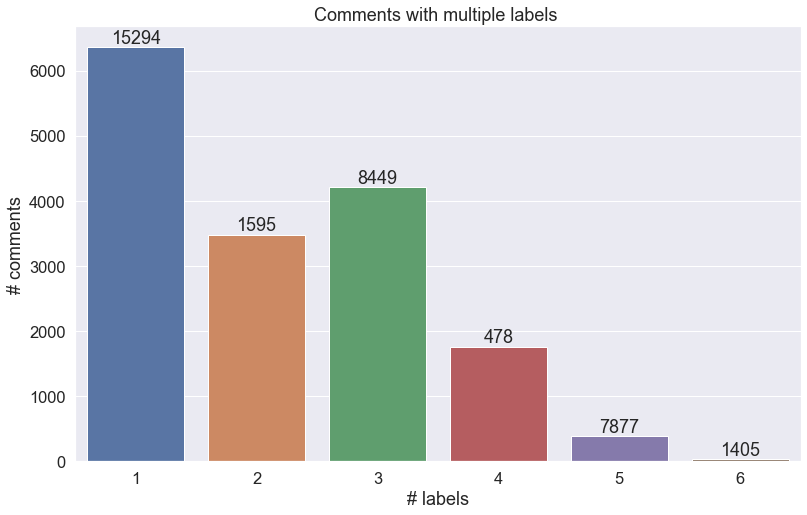

In [73]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(13,8))

ax=sns.barplot(unique_vals.index[1:], unique_vals.values[1:]) 
# As we dont want to display comments with 0 labels which are in majority and can create imbalance in the barplot

plt.title("Comments with multiple labels ")
plt.ylabel('# comments', fontsize=18)
plt.xlabel('# labels', fontsize=18)

rects = ax.patches
labels = df1.iloc[:,2:].sum(axis=0).values
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height +5,label, ha = 'center', va = 'bottom')

In [74]:
from wordcloud import WordCloud

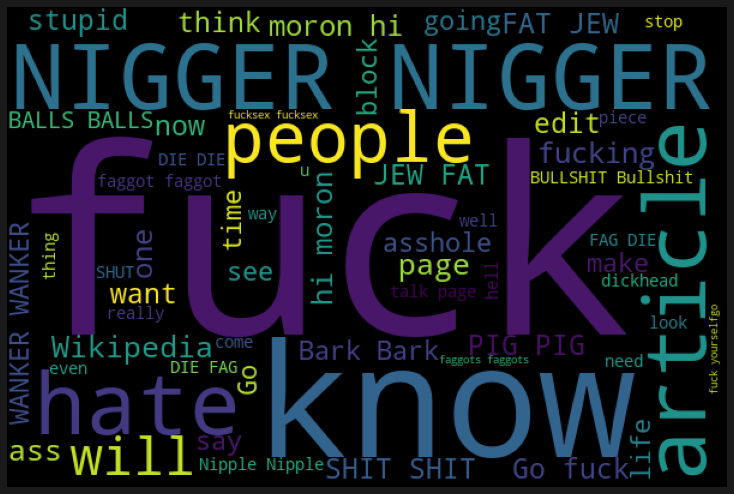

In [94]:
filtered_comments = df1['comment_text'][df1['malignant']==1]
cloud = WordCloud(width=600,height=400,background_color='black',max_words=60).generate(' '.join(filtered_comments))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

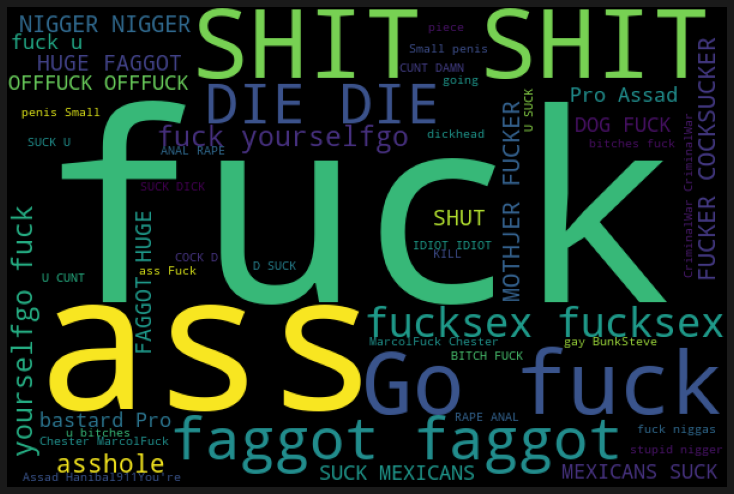

In [89]:
filtered_comments = df1['comment_text'][df1['highly_malignant']==1]
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(filtered_comments))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

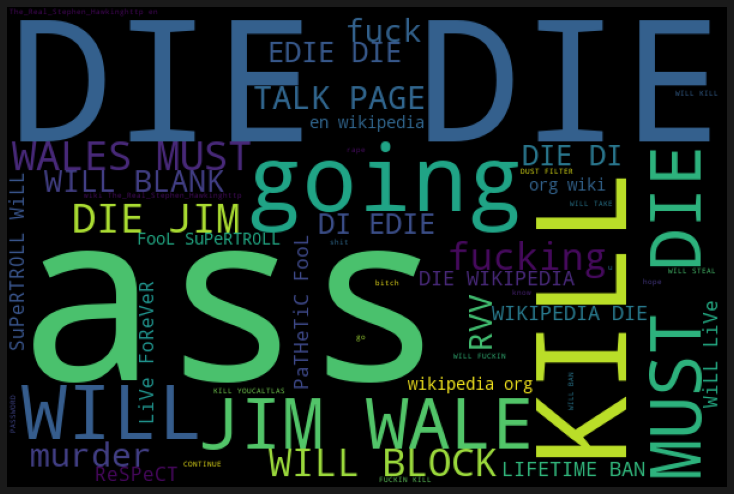

In [90]:
filtered_comments = df1['comment_text'][df1['threat']==1]
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(filtered_comments))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

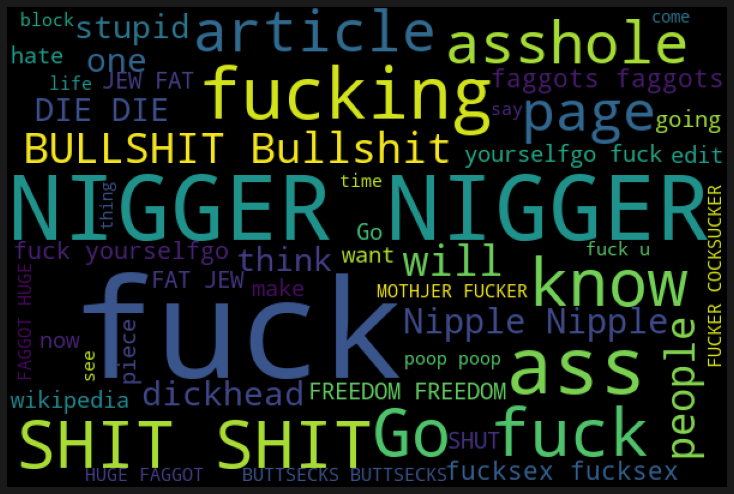

In [91]:
filtered_comments = df1['comment_text'][df1['rude']==1]
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(filtered_comments))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

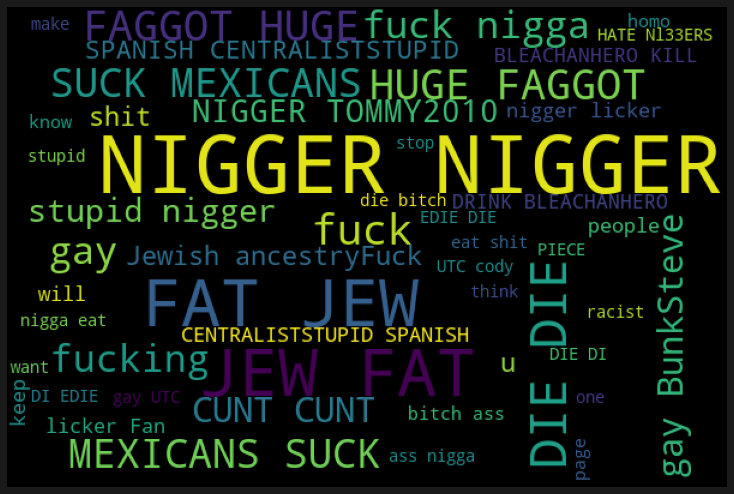

In [92]:
filtered_comments = df1['comment_text'][df1['loathe']==1]
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(filtered_comments))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

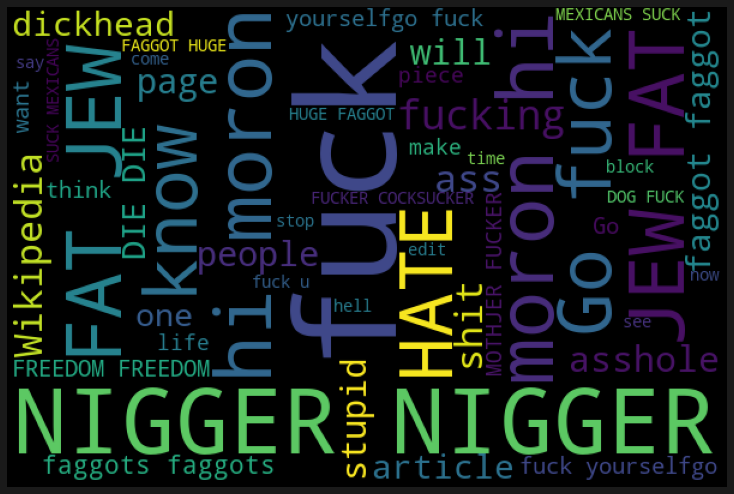

In [93]:
filtered_comments = df1['comment_text'][df1['abuse']==1]
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(filtered_comments))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

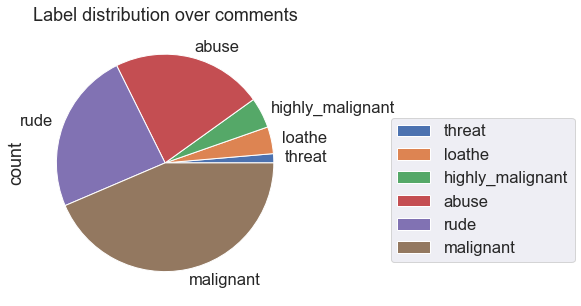

In [124]:
target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_dist = df1[target].sum().to_frame().rename(columns={0: 'count'}).sort_values("count")

df_dist.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.4))

# Data Cleaning:

In [135]:
#lower case comment and remove special characters and numbers

def clean_comment(df1,comment_text,cleaned_comment):
    #Lower casing 
    df1['cleaned_comment'] = df1['comment_text'].str.lower()

    #Removing all numbers, special characters, web addresses and urls
    df1['cleaned_comment'] = df1['cleaned_comment'].apply(
        lambda item: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", item))  

    # remove \n, \d
    df1['cleaned_comment'] = df1['cleaned_comment'].apply(lambda item: re.sub(r"\d+\n", " ", item))
    return df1

In [136]:
%%time
df1_clean=clean_comment(df1,"comment_text","cleaned_comment")
df1_clean.head(10)

Wall time: 11.2 s


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he matches this background colour i m s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i m really not trying to edit war it...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can t make any real suggestions on im...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember...
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,congratulations from me as well use the to...
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,cocksucker before you piss around on my work
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,your vandalism to the matt shirvington article...
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,sorry if the word nonsense was offensive to ...
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,alignment on this subject and which are contra...


In [139]:
##eliminating stopwords
stop_corp = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df1['cleaned_comment'] = df1['cleaned_comment'].apply(lambda element: ' '.join([word for word in element.split() if word not in (stop_corp)]))
df1.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestions improvement wondered sec...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page


In [140]:
#tokenization
df1['tokens'] = df1['cleaned_comment'].apply(lambda x: word_tokenize(x))

In [141]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
     
#adding POS tags with lemmatization
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
    
    #tuple of (token,wordnet_tag)
    wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
    
    lemmatized_sentence=[]
    for word,tag in wordnet_tagged:
        if tag is None:
            #if no available tag,append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatized_sentence)

df1['tokens_lem']=df1['cleaned_comment'].apply(lambda x:lemmatize_sentence(x))

In [142]:
df1.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_comment,tokens,tokens_lem
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,...",explanation edits make username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...,"[aww, matches, background, colour, seemingly, ...",aww match background colour seemingly stuck th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...,"[hey, man, really, trying, edit, war, guy, con...",hey man really try edit war guy constantly rem...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestions improvement wondered sec...,"[make, real, suggestions, improvement, wondere...",make real suggestion improvement wonder sectio...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page,"[sir, hero, chance, remember, page]",sir hero chance remember page


In [144]:
#  Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features = 20000, stop_words='english')
features = tf_vec.fit_transform(df1['tokens_lem'])

In [145]:
# Creating a new variable containing all labels. Subgrouping them to one toxic or non - toxic 
target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
target_data = df1[target]
df1['Target'] =df1[target].sum(axis =1)

In [147]:
df1.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_comment,tokens,tokens_lem,Target
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,...",explanation edits make username hardcore metal...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...,"[aww, matches, background, colour, seemingly, ...",aww match background colour seemingly stuck th...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...,"[hey, man, really, trying, edit, war, guy, con...",hey man really try edit war guy constantly rem...,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestions improvement wondered sec...,"[make, real, suggestions, improvement, wondere...",make real suggestion improvement wonder sectio...,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page,"[sir, hero, chance, remember, page]",sir hero chance remember page,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,congratulations well use tools well talk,"[congratulations, well, use, tools, well, talk]",congratulation well use tool well talk,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,cocksucker piss around work,"[cocksucker, piss, around, work]",cocksucker piss around work,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,vandalism matt shirvington article reverted pl...,"[vandalism, matt, shirvington, article, revert...",vandalism matt shirvington article revert plea...,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,sorry word nonsense offensive anyway intending...,"[sorry, word, nonsense, offensive, anyway, int...",sorry word nonsense offensive anyway intend wr...,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,alignment subject contrary dulithgow,"[alignment, subject, contrary, dulithgow]",alignment subject contrary dulithgow,0


# Splitting Dataset

In [149]:
X = features
y = df1['Target']

In [150]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=56,test_size=.30)

In [151]:
x_train.shape, x_test.shape

((111699, 20000), (47872, 20000))

In [152]:
y_train.shape, y_test.shape

((111699,), (47872,))

## Model1 : Logistic Regression

In [153]:
Logr = LogisticRegression(C=1, max_iter = 3000)

Logr.fit(x_train, y_train)

y_pred_train = Logr.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = Logr.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvscore_LR = cross_val_score(Logr,X,y,cv = 10 )
print("Cross val score of Logistic Regression is :", round(cvscore_LR.mean(),4)*100,'%')
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.932398678591572
Test accuracy is 0.91876253342246
Cross val score of Logistic Regression is : 91.97999999999999 %
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42950
           1       0.38      0.16      0.23      1947
           2       0.33      0.11      0.17      1051
           3       0.49      0.49      0.49      1275
           4       0.43      0.19      0.27       527
           5       0.40      0.02      0.03       112
           6       0.00      0.00      0.00        10

    accuracy                           0.92     47872
   macro avg       0.42      0.28      0.31     47872
weighted avg       0.89      0.92      0.90     47872



In [171]:
print("Hamming Loss  : ",hamming_loss(y_test,y_pred_test))

Hamming Loss  :  0.08123746657754011


## Model2: Multinomial Naive Bayes

In [169]:
MNB = MultinomialNB()
MNB.fit(x_train,y_train)

predmnb= MNB.predict(x_test)
print('Accuracy Score for Multinomial Naive Bayes Classifier is :',round(accuracy_score(y_test,predmnb),4)*100,'% \n')
CVscore_mnb = cross_val_score(MNB,X,y,cv = 10 )
print("Cross validation score :",round(CVscore_mnb.mean(),4)*100,'%')
print('Classification Multinomial Naive Bayes Classifier : \n',classification_report(y_test,predmnb))
print("Hamming Loss for our Multinomial Naive Bayes Classifier model is : ",hamming_loss(y_test,predrf))

Accuracy Score for Multinomial Naive Bayes Classifier is : 90.49000000000001 % 

Cross validation score : 90.74 %
Classification Multinomial Naive Bayes Classifier : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     42950
           1       0.14      0.01      0.02      1947
           2       0.14      0.00      0.00      1051
           3       0.45      0.28      0.34      1275
           4       0.00      0.00      0.00       527
           5       0.00      0.00      0.00       112
           6       0.00      0.00      0.00        10

    accuracy                           0.90     47872
   macro avg       0.24      0.18      0.19     47872
weighted avg       0.84      0.90      0.87     47872

Hamming Loss for our Multinomial Naive Bayes Classifier model is :  0.08382770721925134


## Model 3: Linear SVC

In [163]:
svc = LinearSVC()
svc.fit(x_train,y_train)
# Performing Evaluation metrics for our model
predsvc= svc.predict(x_test)
print('Accuracy Score :',round(accuracy_score(y_test,predsvc),4)*100,'% \n')
CVscore_svc = cross_val_score(svc,X,y,cv = 10 )
print("Cross validation score :", round(CVscore_svc.mean(),4)*100,'%')
print('Classification : \n',classification_report(y_test,predsvc))
print("Hamming Loss : ",hamming_loss(y_test,predsvc))


Accuracy Score : 91.69 % 

Cross validation score : 91.82000000000001 %
Classification : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.34      0.17      0.23      1947
           2       0.30      0.13      0.18      1051
           3       0.46      0.48      0.47      1275
           4       0.30      0.20      0.24       527
           5       0.08      0.02      0.03       112
           6       0.00      0.00      0.00        10

    accuracy                           0.92     47872
   macro avg       0.35      0.28      0.30     47872
weighted avg       0.89      0.92      0.90     47872

Hamming Loss :  0.08309659090909091


## Model 4: Ada Boost Classifier

In [167]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
# Performing Evaluation metrics for our model
predada= ada.predict(x_test)
print('Accuracy Score  :',round(accuracy_score(y_test,predada),4)*100,'% \n')
CVscore_adaboost = cross_val_score(ada,X,y,cv = 10 )
print("Cross validation score of AdaBoost Classifier is :",round(CVscore_adaboost.mean(),4)*100,'%')
print('Classification  : \n',classification_report(y_test,predada))
print("Hamming Loss  : ",hamming_loss(y_test,predada))

Accuracy Score  : 90.7 % 

Cross validation score of AdaBoost Classifier is : 90.94 %
Classification  : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.21      0.01      0.03      1947
           2       0.33      0.02      0.05      1051
           3       0.42      0.38      0.40      1275
           4       0.37      0.09      0.15       527
           5       0.33      0.01      0.02       112
           6       0.05      0.10      0.06        10

    accuracy                           0.91     47872
   macro avg       0.38      0.23      0.24     47872
weighted avg       0.86      0.91      0.88     47872

Hamming Loss  :  0.09295621657754011


__Logistic regression have the lowest difference (roughly 0.09) between cross val score and the accuracy score.Also, it has the lowest hamming loss among all the models ~ 0.081__

## Hyperparameter tuning

In [173]:
log_reg_params = {'C': [0.01, 0.1, 1],'solver':['newton-cg', 'lbfgs', 'liblinear']}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params)
rand_log_reg.fit(x_train, y_train)

print("Best Parameters for Logistic Regression: ", rand_log_reg.best_params_)
print("Best Score for Logistic Regression: ", rand_log_reg.best_score_)
print("------------------------------------------")

Best Parameters for Logistic Regression:  {'solver': 'lbfgs', 'C': 1}
Best Score for Logistic Regression:  0.9185489632910123
------------------------------------------


__Even hyperparameter tuning indicates its best to go for the default parameters for a higher score__

## Saving the model

In [174]:
joblib.dump(Logr,"MalignantComment_pred.pkl")

['MalignantComment_pred.pkl']

# Prediction on test Dataset

In [175]:
df2=pd.read_csv("test.csv")

In [176]:
df2.shape

(153164, 2)

In [177]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [178]:
# No null values are present

In [179]:
clean_comment(df2,"comment_text","cleaned_comment")

,id,comment_text,cleaned_comment
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you ll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,from rfc the title is fine as it is ...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton on lapland...
3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the in...
4,00017695ad8997eb,I don't anonymously edit articles at all.,i don t anonymously edit articles at all
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",i totally agree this stuff is nothing but...
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,throw from out field to home plate d...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",okinotorishima categories i see ...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",one of the founding nations of the e...


In [180]:
df2['cleaned_comment'] = df2['cleaned_comment'].apply(lambda element: ' '.join([word for word in element.split() if word not in (stop_corp)]))
df2.head()

,id,comment_text,cleaned_comment
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hating s...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",look back source information updated correct f...
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit articles


In [186]:
df2['tokens_lem']=df2['cleaned_comment'].apply(lambda x:lemmatize_sentence(x))

In [187]:
df2.head()

,id,comment_text,cleaned_comment,tokens_lem
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hating s...,yo bitch ja rule succesful ever whats hat sad ...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton lapland,source zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",look back source information updated correct f...,look back source information update correct fo...
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit articles,anonymously edit article


In [190]:
tf_vec = TfidfVectorizer(max_features = 20000, stop_words='english')
df2 = tf_vec.fit_transform(df2['tokens_lem'])


In [191]:
logmodel = joblib.load("MalignantComment_pred.pkl")

In [192]:
pred=pd.Series(logmodel.predict(df2))

In [197]:
pred.value_counts()

0    153020
3        65
1        57
2        22
dtype: int64

__Majority are unlabelled or clean comments, whereas majority of the comments which are hurtful belong to 1 or 3 categories. Least comments belong to only one category.__

In [198]:
#Converting the results into .csv format
pred.to_csv('Malignant_comments_test_results.csv',index = True)